In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
np.random.seed(42)

In [6]:
tfms=[flip_lr(p=0.5),dihedral_affine() ],[]

In [7]:
mixup=0.2

In [8]:
loss_func = LabelSmoothingCrossEntropy()

In [9]:
alpha=0.99
mom=0.9
eps=1e-6

In [10]:
opt_func = partial(optim.Adam, betas=(mom,alpha), eps=eps)

In [11]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [12]:
data = src.transform(tfms,size=(224)).databunch(bs=192).normalize().presize(448, scale=(0.35,1))

In [13]:
learn = cnn_learner(data, models.densenet121,pretrained=False, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func,opt_func=opt_func,wd=1e-2)

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [14]:
learn= learn.mixup(alpha=mixup)

In [15]:
learn.bn_wd=False

In [16]:
learn.true_wd=True

In [17]:
learn.load('exp-5-round-4')

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [18]:
data_256 = src.transform(tfms,size=(256)).databunch(bs=128).normalize().presize(512, scale=(0.35,1))

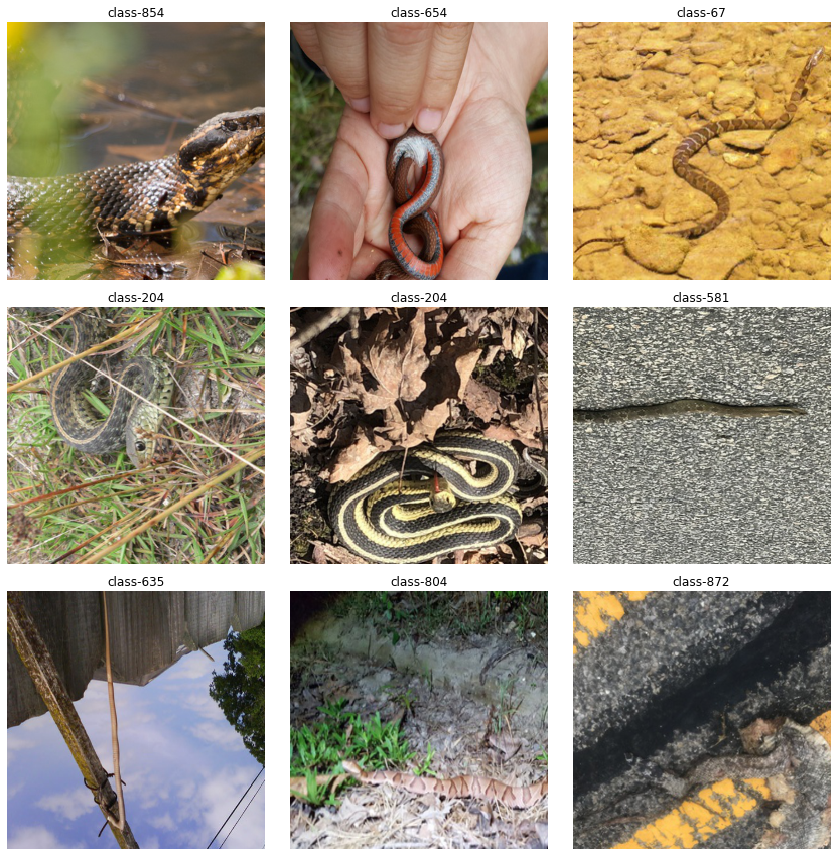

In [19]:
data_256.show_batch(rows=3, figsize=(12,12))


In [20]:
learn.data= data_256

In [21]:
learn.data

ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None

In [22]:
learn = learn.to_fp16(dynamic=True)

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


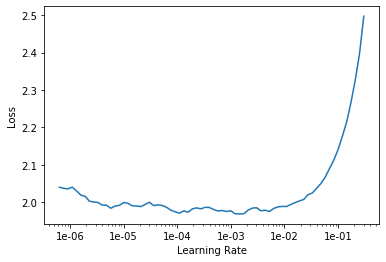

In [25]:
learn.recorder.plot()

In [26]:
lr=5e-5

In [27]:
learn.fit_one_cycle(10, lr, div_factor=10, pct_start=0.3)


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.953887,1.619424,0.291998,0.708002,0.654745,08:02
1,1.931728,1.597051,0.288600,0.711400,0.656844,08:00
2,1.919459,1.575538,0.285810,0.714190,0.660962,08:00
3,1.893939,1.562421,0.283504,0.716496,0.662709,08:01
4,1.891030,1.549954,0.281987,0.718013,0.665308,08:00
5,1.890321,1.543202,0.282655,0.717345,0.665384,08:00
6,1.884954,1.543559,0.282534,0.717466,0.664521,08:02
7,1.866659,1.539414,0.280531,0.719469,0.668668,08:00
8,1.893094,1.539275,0.280349,0.719651,0.668230,08:00
9,1.873260,1.538848,0.281138,0.718862,0.667763,08:00


In [28]:
learn.save('exp-5-round-5')

In [29]:
lr=1e-3

In [30]:
learn.fit_one_cycle(4, lr, div_factor=10, pct_start=0.3)


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.858713,1.546381,0.284718,0.715282,0.663717,08:01
1,1.889228,1.530461,0.284475,0.715525,0.662983,08:01
2,1.813674,1.520261,0.281441,0.718558,0.665982,08:02
3,1.795798,1.510194,0.276103,0.723897,0.673302,08:02


In [31]:
learn.save('exp-5-round-5-2')

In [32]:
learn.fit_one_cycle(4, lr, div_factor=10, pct_start=0.3)


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.816018,1.541601,0.284839,0.715161,0.661928,08:01
1,1.819872,1.523934,0.282412,0.717588,0.666740,08:01
2,1.777985,1.506708,0.274525,0.725475,0.675012,08:01
3,1.751288,1.501760,0.273191,0.726809,0.677422,08:01


In [33]:
learn.save('exp-5-round-5-3')